# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Observerable Trends

1. Temperatures are higher closer to the equator of the world and are lower in the Southern Hemisphere compared to the Northern Hemisphere.
2. There seems to be no correlation between humidity and latitude as well as cloudiness and latitude.
3. Wind speeds have a higher maximum in the northern hempisphere compared to the southern hemisphere

In [3]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from pprint import pprint
from citipy import citipy
from api_keys import weather_api_key
from api_keys import g_key
lat_range = (-90, 90)
lng_range = (-180,180)

## Generate Cities List

In [4]:
lat_lngs = []
cities = []

lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500 )
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": 145.7966,
        "lat": -5.2246
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 80.46,
        "feels_like": 88.03,
        "temp_min": 80.46,
        "temp_max": 80.46,
        "pressure": 1007,
        "humidity": 79,
        "sea_level": 1007,
        "grnd_level": 1007
    },
    "visibility": 10000,
    "wind": {
        "speed": 3.22,
        "deg": 67,
        "gust": 5.61
    },
    "clouds": {
        "all": 99
    },
    "dt": 1616230927,
    "sys": {
        "country": "PG",
        "sunrise": 1616185257,
        "sunset": 1616228868
    },
    "timezone": 36000,
    "id": 2091996,
    "name": "Madang",
    "cod": 200
}


In [6]:
print(requests.get(query_url + city))

<Response [200]>


In [7]:
city_name = []
country = []
date = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []

processing_value = 1

print(f"Beginning Data Retrieval")
print("----------")

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing City # {processing_value} | {city_record}")
        processing_value += 1
    
    except:
        print("City not found. Skipping..")
    continue

print(f"----------")
print(f"Data Retrieval Complete")
print(f"----------")

Beginning Data Retrieval
----------
Processing City # 1 | New Norfolk
Processing City # 2 | Busselton
Processing City # 3 | Noyabrsk
Processing City # 4 | Port Elizabeth
Processing City # 5 | Punta Arenas
Processing City # 6 | Morondava
Processing City # 7 | Ponta do Sol
Processing City # 8 | Cabo San Lucas
Processing City # 9 | Yar-Sale
Processing City # 10 | Cidreira
Processing City # 11 | Vaini
Processing City # 12 | Tuktoyaktuk
Processing City # 13 | Thanh Hoa
Processing City # 14 | Tadine
City not found. Skipping..
Processing City # 15 | Saint Paul Harbor
Processing City # 16 | Klaksvík
Processing City # 17 | Mengcheng
Processing City # 18 | Bredasdorp
Processing City # 19 | Peniche
Processing City # 20 | Hobart
Processing City # 21 | George Town
Processing City # 22 | Chumikan
Processing City # 23 | Tilichiki
Processing City # 24 | Rikitea
Processing City # 25 | Beloha
Processing City # 26 | Avila
Processing City # 27 | Dudinka
Processing City # 28 | Lebu
Processing City # 29 | A

Processing City # 232 | Burgersdorp
Processing City # 233 | Lima
Processing City # 234 | Gambiran
Processing City # 235 | Kilindoni
Processing City # 236 | Karratha
Processing City # 237 | Belmonte
Processing City # 238 | Tuy Hoa
City not found. Skipping..
Processing City # 239 | Tabou
Processing City # 240 | Pauini
Processing City # 241 | Muros
Processing City # 242 | Portland
Processing City # 243 | Faanui
Processing City # 244 | Barcelona
Processing City # 245 | Pokhara
Processing City # 246 | São Filipe
City not found. Skipping..
City not found. Skipping..
Processing City # 247 | Xai-Xai
Processing City # 248 | Lorengau
Processing City # 249 | Havelock
Processing City # 250 | Vanimo
Processing City # 251 | Okha
Processing City # 252 | Opuwo
Processing City # 253 | Guerrero Negro
Processing City # 254 | Arlit
City not found. Skipping..
Processing City # 255 | Bambous Virieux
Processing City # 256 | Vitim
Processing City # 257 | Comodoro Rivadavia
Processing City # 258 | Latung
Proce

Processing City # 459 | Ponta Delgada
Processing City # 460 | Pozoblanco
Processing City # 461 | Virden
Processing City # 462 | Mitsamiouli
Processing City # 463 | Río Cuarto
Processing City # 464 | Reshetylivka
Processing City # 465 | Zyryanka
Processing City # 466 | Bilyayivka
Processing City # 467 | Moura
Processing City # 468 | Fare
Processing City # 469 | Ørnes
Processing City # 470 | Douglas
Processing City # 471 | Dakar
Processing City # 472 | Kodarmā
Processing City # 473 | Hofn
Processing City # 474 | Dzhebariki-Khaya
Processing City # 475 | Madang
Processing City # 476 | Silvassa
Processing City # 477 | Xam Nua
Processing City # 478 | Hirado
Processing City # 479 | Hammerfest
Processing City # 480 | Bud
Processing City # 481 | Brigantine
Processing City # 482 | Caravelas
City not found. Skipping..
Processing City # 483 | Dingli
Processing City # 484 | San Cristobal
Processing City # 485 | Laguna
Processing City # 486 | Namatanai
Processing City # 487 | Tazmalt
Processing City

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temperature": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City               566
Country            566
Date               566
Latitude           566
Longitude          566
Max Temperature    566
Humidity           566
Cloudiness         566
Wind Speed         566
dtype: int64

In [9]:
weather_df.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,1616230928,-42.7826,147.0587,63.00,58,0,2.93
1,Busselton,AU,1616230928,-33.6500,115.3333,93.00,24,10,1.99
2,Noyabrsk,RU,1616230928,63.1994,75.4507,9.57,93,100,23.47
3,Port Elizabeth,ZA,1616230928,-33.9180,25.5701,68.00,94,90,3.44
4,Punta Arenas,CL,1616230928,-53.1500,-70.9167,39.20,81,0,13.80


In [10]:
weather_df.to_csv("weather_data.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
weather_df.describe()

,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
count,5.660000e+02,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,1.616231e+09,18.924714,18.218830,56.575459,70.777385,50.153710,8.582032
std,6.144929e+01,33.356426,91.766027,28.695798,21.653831,40.248424,5.617048
min,1.616231e+09,-54.800000,-179.166700,-28.280000,8.000000,0.000000,0.020000
25%,1.616231e+09,-8.914575,-63.124200,37.990000,60.000000,1.000000,4.557500
50%,1.616231e+09,21.619900,21.582000,63.000000,76.000000,46.000000,7.280000
75%,1.616231e+09,47.004375,101.478725,79.867500,87.000000,90.000000,11.500000
max,1.616231e+09,78.218600,179.316700,102.650000,100.000000,100.000000,35.140000


In [12]:
weather_df.dtypes

City                object
Country             object
Date                 int64
Latitude           float64
Longitude          float64
Max Temperature    float64
Humidity             int64
Cloudiness           int64
Wind Speed         float64
dtype: object

In [13]:
max_humidity = weather_df.loc[weather_df["Humidity"] == 100]
max_humidity

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
15,Klaksvík,FO,1616230931,62.2266,-6.5890,42.8,100,75,14.97
77,Nelson Bay,AU,1616230946,-32.7167,152.1500,69.8,100,90,14.97
98,Muroto-misakicho,JP,1616230951,33.2833,134.1500,60.8,100,75,13.80
104,Santa Cruz de la Sierra,BO,1616230952,-17.8000,-63.1667,71.6,100,75,4.61
142,Alofi,NU,1616230961,-19.0595,-169.9187,75.2,100,100,10.36
170,Fortuna,US,1616230966,40.5982,-124.1573,43.0,100,75,6.91
300,Cabedelo,BR,1616230996,-6.9811,-34.8339,75.2,100,75,4.61
398,Palmas,BR,1616231019,-10.2128,-48.3603,71.6,100,75,5.75
427,Cayenne,GF,1616231025,4.9333,-52.3333,79.0,100,40,5.53
457,Mount Isa,AU,1616230804,-20.7333,139.5000,75.2,100,90,10.36


In [14]:
#  Get the indices of cities that have humidity over 100%.
max_humidity.index

Int64Index([15, 77, 98, 104, 142, 170, 300, 398, 427, 457, 506, 507], dtype='int64')

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop([102, 118, 187, 190, 398, 439, 449, 497, 518, 534, 543, 547])
clean_city_data

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,1616230928,-42.7826,147.0587,63.00,58,0,2.93
1,Busselton,AU,1616230928,-33.6500,115.3333,93.00,24,10,1.99
2,Noyabrsk,RU,1616230928,63.1994,75.4507,9.57,93,100,23.47
3,Port Elizabeth,ZA,1616230928,-33.9180,25.5701,68.00,94,90,3.44
4,Punta Arenas,CL,1616230928,-53.1500,-70.9167,39.20,81,0,13.80
...,...,...,...,...,...,...,...,...,...
561,Khani,GE,1616231055,41.9563,42.9566,50.00,66,90,12.66
562,Grajaú,BR,1616231055,-5.8194,-46.1386,70.00,99,94,3.36
563,Guasdualito,VE,1616231055,7.2424,-70.7324,75.36,70,100,2.35
564,Qarqīn,AF,1616231055,37.4185,66.0436,59.40,83,100,21.54


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

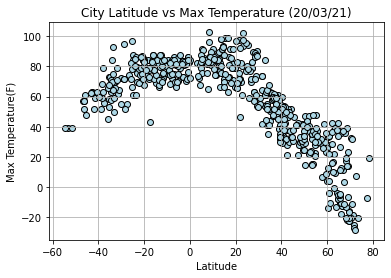

In [16]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Max Temperature"], facecolors = "lightblue", marker = "o", edgecolor="black")

plt.title("City Latitude vs Max Temperature (20/03/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid(True)

plt.savefig("City_Latitude_vs_Max_Temperature.png")

plt.show()

In the scatter plot above we are comparing the latitutde and max temperature of the cities generated.

## Latitude vs. Humidity Plot

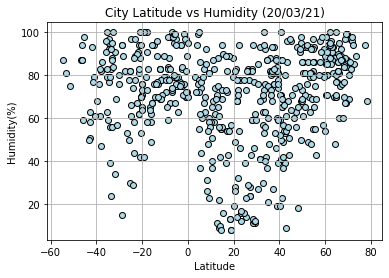

In [17]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Humidity"], facecolors = "lightblue", marker = "o", edgecolor="black")

plt.title("City Latitude vs Humidity (20/03/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)

plt.savefig("City_Latitude_vs_humidity.png")

plt.show()

In the scatter plot above we are comparing the latitutde and humidity of the cities generated.

## Latitude vs. Cloudiness Plot

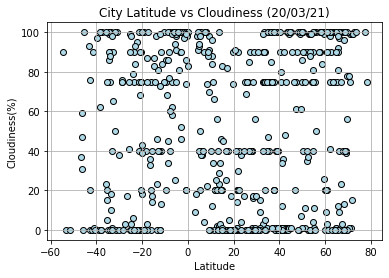

In [18]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Cloudiness"], facecolors = "lightblue", marker = "o", edgecolor="black")

plt.title("City Latitude vs Cloudiness (20/03/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)

plt.savefig("City_Latitude_vs_cloudiness.png")

plt.show()

In the scatter plot above we are comparing the latitutde and cloudiness of the cities generated.

## Latitude vs. Wind Speed Plot

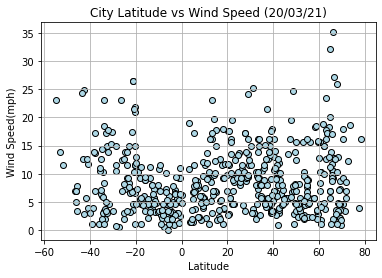

In [19]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Wind Speed"], facecolors = "lightblue", marker = "o", edgecolor="black")

plt.title("City Latitude vs Wind Speed (20/03/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid(True)

plt.savefig("City_Latitude_vs_windspeed.png")

plt.show()

In the scatter plot above we are comparing the latitutde and wind speeds of the cities generated.

## Linear Regression

In [20]:
north_hemisphere_df = clean_city_data.loc[clean_city_data["Latitude"] >= 0]
south_hemisphere_df = clean_city_data.loc[clean_city_data["Latitude"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8013601175542981


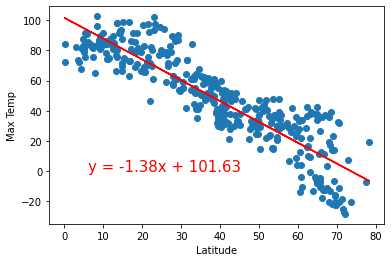

In [21]:
x_values = north_hemisphere_df['Latitude']
y_values = north_hemisphere_df['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4155535395281711


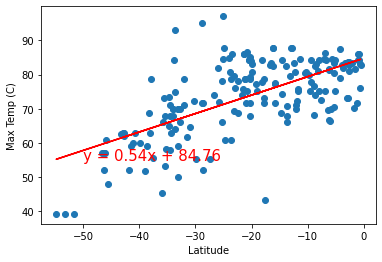

In [22]:
x_values = south_hemisphere_df['Latitude']
y_values = south_hemisphere_df['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15194116678469516


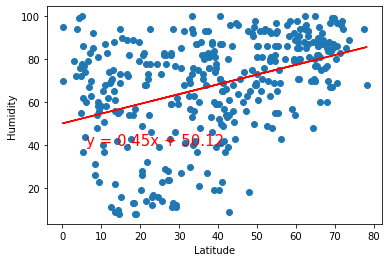

In [23]:
x_values = north_hemisphere_df['Latitude']
y_values = north_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.013192965563307901


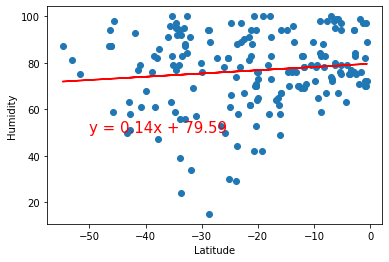

In [24]:
x_values = south_hemisphere_df['Latitude']
y_values = south_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.024382360599326972


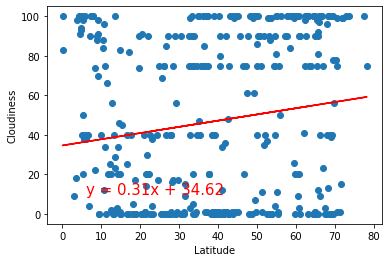

In [25]:
x_values = north_hemisphere_df['Latitude']
y_values = north_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09107581813545289


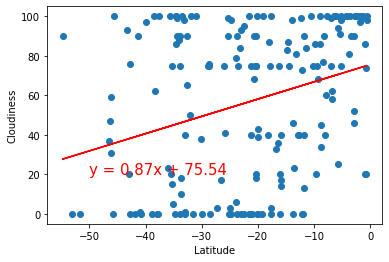

In [26]:
x_values = south_hemisphere_df['Latitude']
y_values = south_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005177615217181317


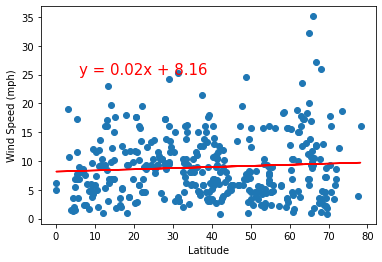

In [27]:
x_values = north_hemisphere_df['Latitude']
y_values = north_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11591746809978523


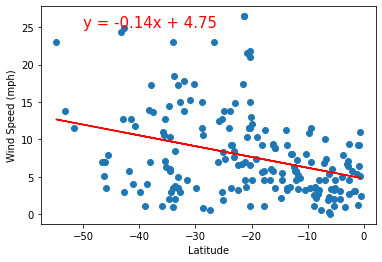

In [28]:
x_values = south_hemisphere_df['Latitude']
y_values = south_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()